![](../images/kurt.jpeg)

### 1.0 Business Understanding


Though my old firend Kurt has been successfully selling used cars for over 20 years, he now wants to focus more on customer satisfaction instead of just sales and profits.  Accordingly, he has asked me to provide a clear picture for what customers care most about in a used car purchase.   Simply put, Kurt asked me this question, "What's the best way to price a used car?".

I told Kurt, the answer lies in the data!  For this project I'll examine a used car data set with hundreds of thousands of entries.  First I'll get acquainted with the dataset, with a focus on the price column, it's range, mean and variation around the mean.  Then, I'll examine missing data, and utilize plots to understand the data, and whether missing data is relevant and how to treat it.   After the dataset is cleaned, I'll use regression modeling to evaluate what columns, attributes, will help Kurt price the car.  Since Kurt doesn't care about a lot of "mumbo jumbo", and knows about the "KISS" principple, I'll ensure that I provide him with a simplest answer possible to his question.

### 2.0 Data Understanding



Here are the steps to understand the data:
* Load, import appropriate libraries, modules
* Use the dataframe info function to understand data types and missing rows
* Use a bar plot to visualize missing data
* Use the dataframe describe function to evaluate outliers, focusing on price
* Use an assessment of Kurt's business to help bound and eliminate outliers

In [173]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [174]:
# Initial exploration
df = pd.read_csv("../data/vehicles.csv")
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  str    
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  str    
 5   model         421603 non-null  str    
 6   condition     252776 non-null  str    
 7   cylinders     249202 non-null  str    
 8   fuel          423867 non-null  str    
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  str    
 11  transmission  424324 non-null  str    
 12  VIN           265838 non-null  str    
 13  drive         296313 non-null  str    
 14  size          120519 non-null  str    
 15  type          334022 non-null  str    
 16  paint_color   296677 non-null  str    
 17  state         426880 non-null  str    
dtypes: float64(2), 

From the info above, the dataframe has 426880 rows, with about half of the columns having missing data.

In [175]:
# Print out the percent data complete for each column, click between table and chart view to see magnitude of missing data
non_null_pct = df.notnull().mean().sort_values(ascending=False) * 100
non_null_pct


id              100.000000
region          100.000000
state           100.000000
price           100.000000
year             99.717719
transmission     99.401237
fuel             99.294181
odometer         98.969265
model            98.763821
title_status     98.069247
manufacturer     95.866286
type             78.247283
paint_color      69.498922
drive            69.413653
VIN              62.274644
condition        59.214768
cylinders        58.377530
size             28.232524
dtype: float64

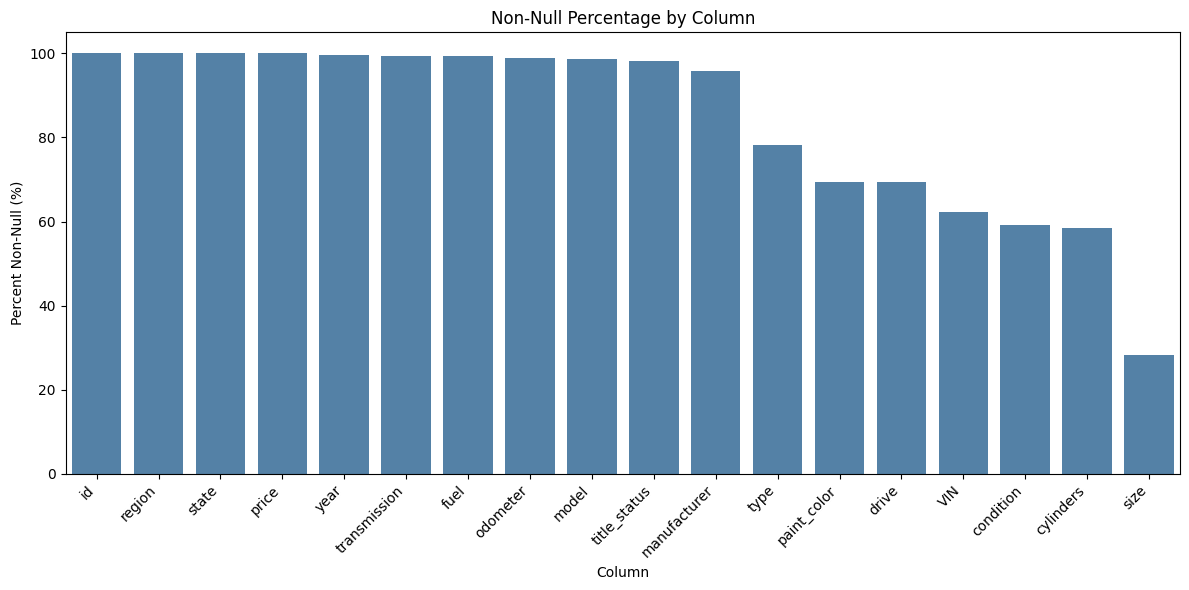

In [176]:
#here's a simple plot of the data above that helps visualize the number of columns with missing data, and the magnitude
plt.figure(figsize=(12, 6))

sns.barplot(
    x=non_null_pct.index,
    y=non_null_pct.values,
    color="steelblue"
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Percent Non‑Null (%)")
plt.xlabel("Column")
plt.title("Non‑Null Percentage by Column")
plt.tight_layout()
plt.show()


In [177]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


Since only **id, price, year and odometer** have numeric values, describe only shows those columns.  **Whoa!**  Note the price column, **price**, has a mean of 7.5199e4, or $75,199 which might be good for new exotic cars, but not used cars.  The max is 3.7 Billion dollars, clearly there is errant data in this dataset, and outside of Kurt's lane!

In [178]:
df["price"].sort_values(ascending=False).head(20)


318592    3736928711
356716    3736928711
257840    3024942282
91576     3024942282
37410     3009548743
184704    1410065407
153082    1234567890
29386     1111111111
37409     1111111111
122470     987654321
280        987654321
230753     135008900
193736     123456789
288356     123456789
307488     123456789
358555     123456789
137807     123456789
207080     123456789
241404     113456789
1838        99999999
Name: price, dtype: int64

From above we can see the top 20 prices range from 3.7 Billion dollars
to  987 Million dollars.  This data needs to be cleaned!

In [179]:
# let's filter out price to be in a reasonable range for a Kurt's used car business.
# Kurt has indicated he only sells cars in the $500 to $25000 range.
df_clean1 = df[df["price"].between(500, 25000)]
df_clean1["price"].describe()

count    271275.000000
mean      11563.731339
std        6664.193732
min         500.000000
25%        5995.000000
50%       10499.000000
75%       16987.000000
max       25000.000000
Name: price, dtype: float64

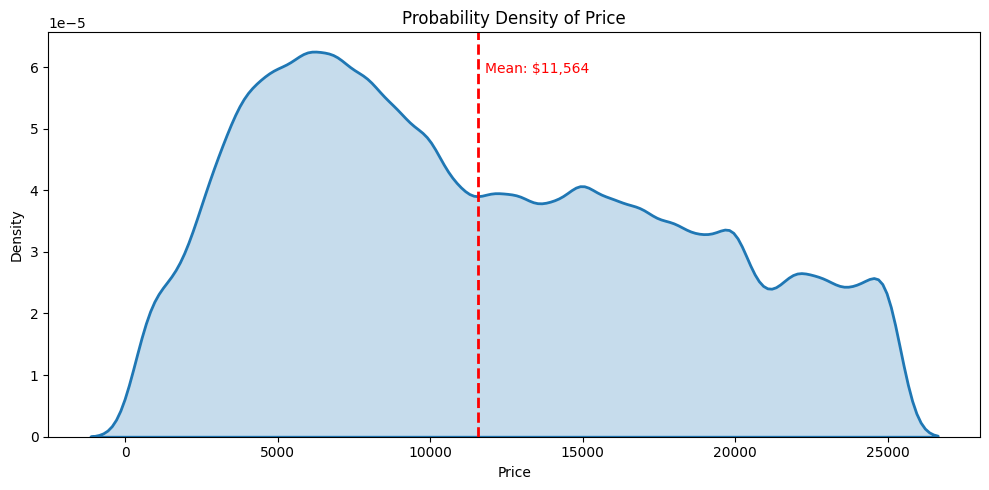

In [180]:
#plot the price probably density function to evaluate sanity of the price column.

plt.figure(figsize=(10, 5))

# KDE / PDF
sns.kdeplot(
    data=df_clean1,
    x="price",
    fill=True,
    linewidth=2
)

# Compute the mean
mean_price = df_clean1["price"].mean()

# Add a vertical line for the mean
plt.axvline(mean_price, color="red", linestyle="--", linewidth=2)

# Add mean text slightly to the right of the line, in a prior version it collided
plt.text(
    mean_price * 1.02,          # shift right by ~2%
    plt.ylim()[1] * 0.9,        # near the top of the plot
    f"Mean: ${mean_price:,.0f}",
    color="red",
    ha="left"                   # left-align so it sits cleanly beside the line
)

plt.title("Probability Density of Price")
plt.xlabel("Price")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


From the photo that Kurt sent me, the price range of $500-$25000 is consistent with Kurt's attire and the cars I see in the background.

In [181]:
df_clean1.info()

<class 'pandas.DataFrame'>
Index: 271275 entries, 0 to 426875
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            271275 non-null  int64  
 1   region        271275 non-null  str    
 2   price         271275 non-null  int64  
 3   year          270918 non-null  float64
 4   manufacturer  260497 non-null  str    
 5   model         267809 non-null  str    
 6   condition     169879 non-null  str    
 7   cylinders     166714 non-null  str    
 8   fuel          269414 non-null  str    
 9   odometer      269702 non-null  float64
 10  title_status  265750 non-null  str    
 11  transmission  269966 non-null  str    
 12  VIN           144114 non-null  str    
 13  drive         190331 non-null  str    
 14  size          90279 non-null   str    
 15  type          205665 non-null  str    
 16  paint_color   189377 non-null  str    
 17  state         271275 non-null  str    
dtypes: float64(2), int64

Now our dataset has 271,000 entries vs the original 427,000 entries.

In [182]:
# Print out the percent data complete for each column, click between table and chart view to see magnitude of missing data
non_null_pct = df_clean1.notnull().mean().sort_values(ascending=False) * 100
non_null_pct


id              100.000000
region          100.000000
state           100.000000
price           100.000000
year             99.868399
transmission     99.517464
odometer         99.420146
fuel             99.313980
model            98.722330
title_status     97.963321
manufacturer     96.026910
type             75.814211
drive            70.161644
paint_color      69.809971
condition        62.622431
cylinders        61.455718
VIN              53.124689
size             33.279513
dtype: float64

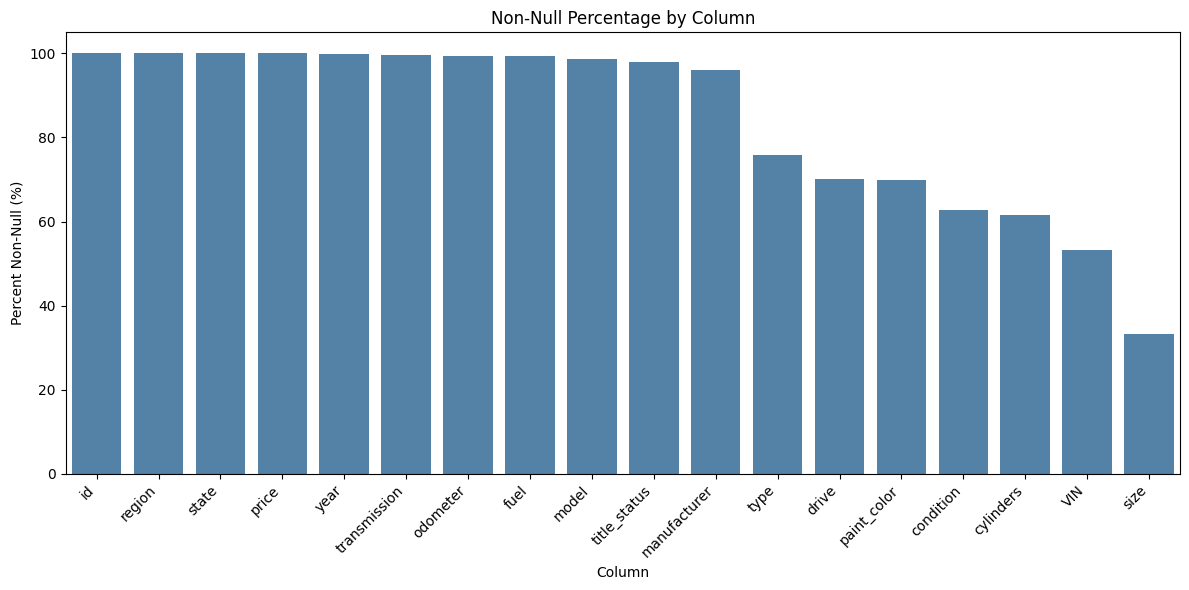

In [183]:
#here's a replot of the data above that helps visualize the number of columns with missing data, and the magnitude, narrowed for price, $500-$25,000.
plt.figure(figsize=(12, 6))

sns.barplot(
    x=non_null_pct.index,
    y=non_null_pct.values,
    color="steelblue"
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Percent Non‑Null (%)")
plt.xlabel("Column")
plt.title("Non‑Null Percentage by Column")
plt.tight_layout()
plt.show()


### 3.0 Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

From the chart above, there is still a lot of missing data for columns **size, cylinders, condition, VIN, drive, paint_color** and **type**.   With a focus on **price** prediction, the next steps are to:
* Systematically plot each columns data beginning with **size**, and ending with **type**
* Plots will consist of pdf plots and box plots to evaluate nature of data, and nature of the missing data
* Use plot info to drop columns altogether or combine data types within a column
* Use plot info to determine how to treat the missing data


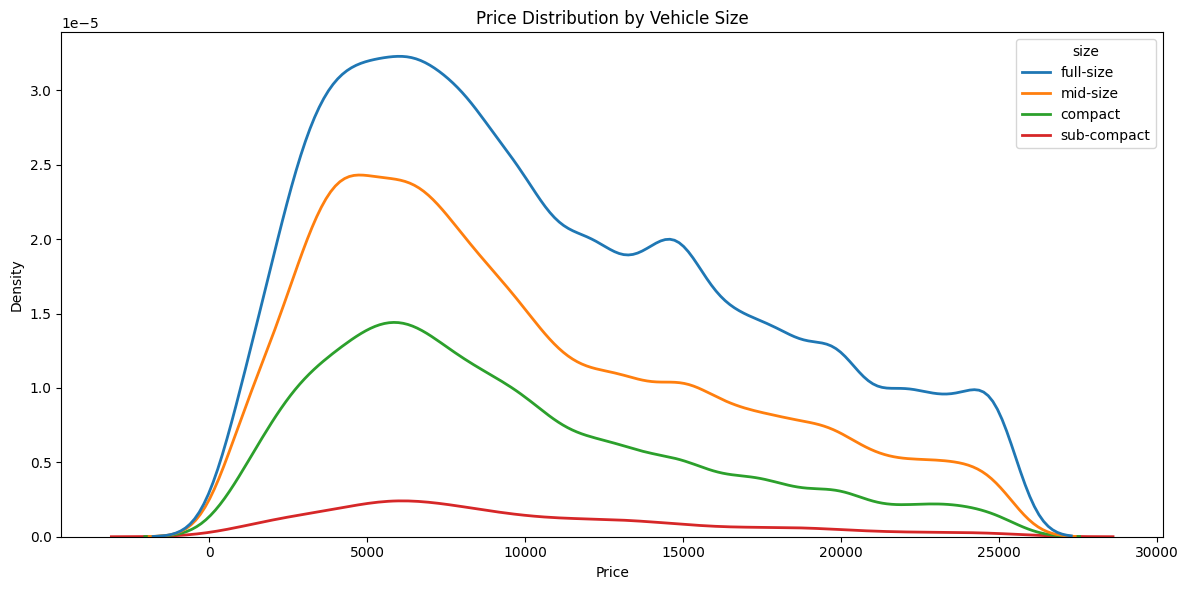

In [184]:
#We begin with the pdf of price using the size attribute
plt.figure(figsize=(12, 6))

sns.kdeplot(
    data=df_clean1,
    x="price",
    hue="size",        # separate curves by size
    fill=False,        # keep it clean
    linewidth=2
)

plt.title("Price Distribution by Vehicle Size")
plt.xlabel("Price")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


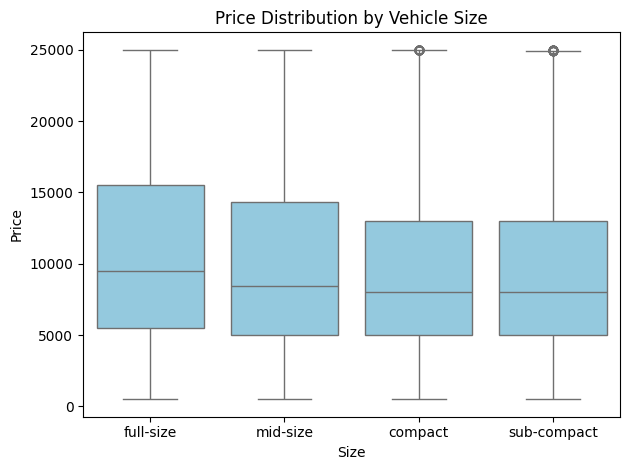

In [185]:
# now let's plot the box plot as another view into mean and variation around the mean

sns.boxplot(
    data=df_clean1,
    x="size",
    y="price",
    color="skyblue"
)

plt.title("Price Distribution by Vehicle Size")
plt.xlabel("Size")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


In [186]:
df_clean1.groupby("size")["price"].mean().sort_values()


size
compact         9424.277720
sub-compact     9485.799282
mid-size        9947.528665
full-size      10829.477767
Name: price, dtype: float64

From viewing the pdf and box plots and printing the mean values, side by side, **size** is a weak predictor of price (the means are very close, and the variation around those means are also similar).
Accordingly, Kurt can't use size to help differentiate price, we can therefore drop it from our dataset.  Additionally, since we know that the VIN is simply the Vehicle Identification Number, and does not predict price, we can drop it as well.

In [187]:
df_clean1["VIN"].tail()


426856    JN8AZ08W03W203477
426869    JTNKARJE8GJ511296
426870    5NPEG4JAXLH051710
426871    KNDPMCAC7J7417329
426875    1N4AA6AV6KC367801
Name: VIN, dtype: str

In [188]:
df_clean2 = df_clean1.drop(columns=["VIN", "size"])
# Print out the percent data complete for each column, click between table and chart view to see magnitude of missing data
non_null_pct = df_clean2.notnull().mean().sort_values(ascending=False) * 100
non_null_pct


id              100.000000
region          100.000000
price           100.000000
state           100.000000
year             99.868399
transmission     99.517464
odometer         99.420146
fuel             99.313980
model            98.722330
title_status     97.963321
manufacturer     96.026910
type             75.814211
drive            70.161644
paint_color      69.809971
condition        62.622431
cylinders        61.455718
dtype: float64

The next column to evaluate is **cylinders**.  Let's start with the box plot.

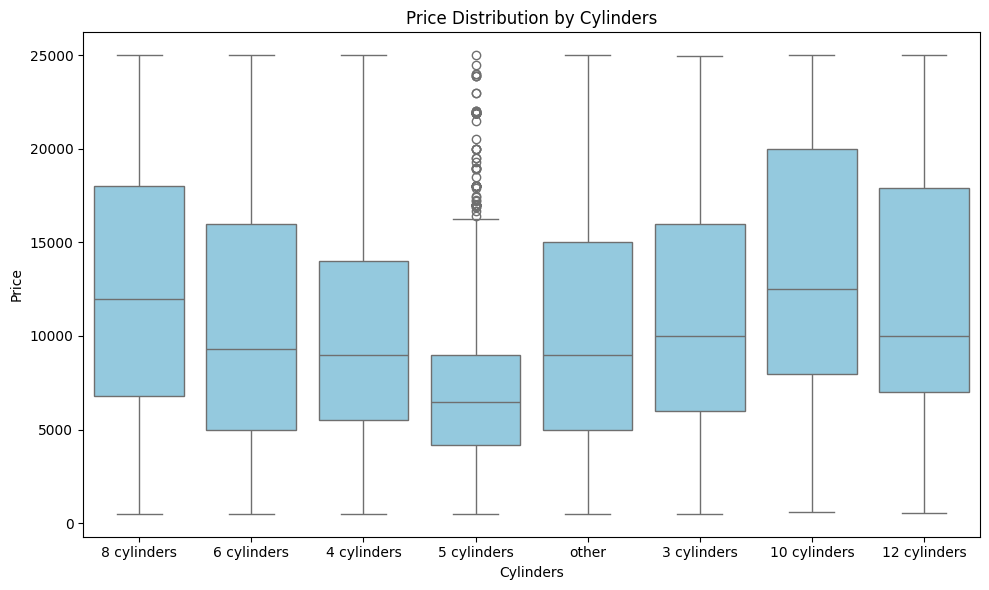

In [189]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df_clean2,
    x="cylinders",
    y="price",
    color="skyblue"
)

plt.title("Price Distribution by Cylinders")
plt.xlabel("Cylinders")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


**Five** cylinder vehicles have a significant number of outliers, and may not a reliable predictor of price.   Also note the **other** category.

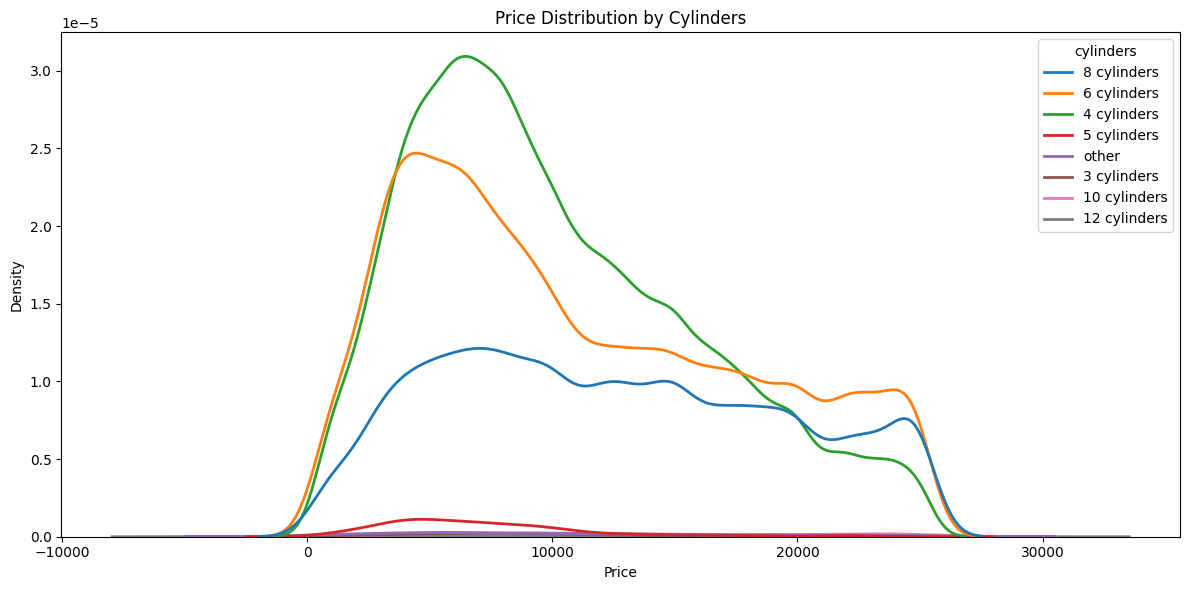

In [190]:
plt.figure(figsize=(12, 6))

sns.kdeplot(
    data=df_clean2,
    x="price",
    hue="cylinders",  # separate curves by size
    fill=False,  # keep it clean
    linewidth=2
)

plt.title("Price Distribution by Cylinders")
plt.xlabel("Price")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


In [191]:
df_clean2.groupby("cylinders")["price"].mean().sort_values(ascending=False)



cylinders
10 cylinders    13561.870924
8 cylinders     12433.618645
12 cylinders    11531.464286
6 cylinders     10951.333908
3 cylinders     10864.476190
other           10430.323097
4 cylinders     10077.459091
5 cylinders      7246.957276
Name: price, dtype: float64

In [192]:
df_clean2["cylinders"].value_counts()

cylinders
4 cylinders     65817
6 cylinders     59205
8 cylinders     37983
5 cylinders      1615
other             749
10 cylinders      736
3 cylinders       525
12 cylinders       84
Name: count, dtype: int64

In [193]:
df_clean2["cylinders"].value_counts(normalize=True).sort_values(ascending=False) * 100


cylinders
4 cylinders     39.478988
6 cylinders     35.512914
8 cylinders     22.783330
5 cylinders      0.968725
other            0.449272
10 cylinders     0.441475
3 cylinders      0.314911
12 cylinders     0.050386
Name: proportion, dtype: float64

Let's add up the top 3 entries to see what % of the dataset is contained by vehicles that are 4, 6, or 8 cylinders.

In [194]:
pct_top3 = (
    df_clean2["cylinders"]
    .value_counts(normalize=True)
    .sort_values(ascending=False)
    .head(3)
    .sum() * 100
)

pct_top3


np.float64(97.7752318341591)

Since these entries represent almost 98% of the population, we can drop all other cylinders.   Now we need to examine the missing data.

In [195]:
df_clean2["cylinders"].isna().mean() * 100


np.float64(38.544281633029215)

In [196]:
# To analyze the missing data, let's replace null values wiht the mising text.
df_clean2["cylinders"] = df_clean2["cylinders"].fillna("missing")

# Next we'll set all allowed values and drop the rest
allowed = ["4 cylinders", "6 cylinders", "8 cylinders", "missing"]
df_clean2 = df_clean2[df_clean2["cylinders"].isin(allowed)]


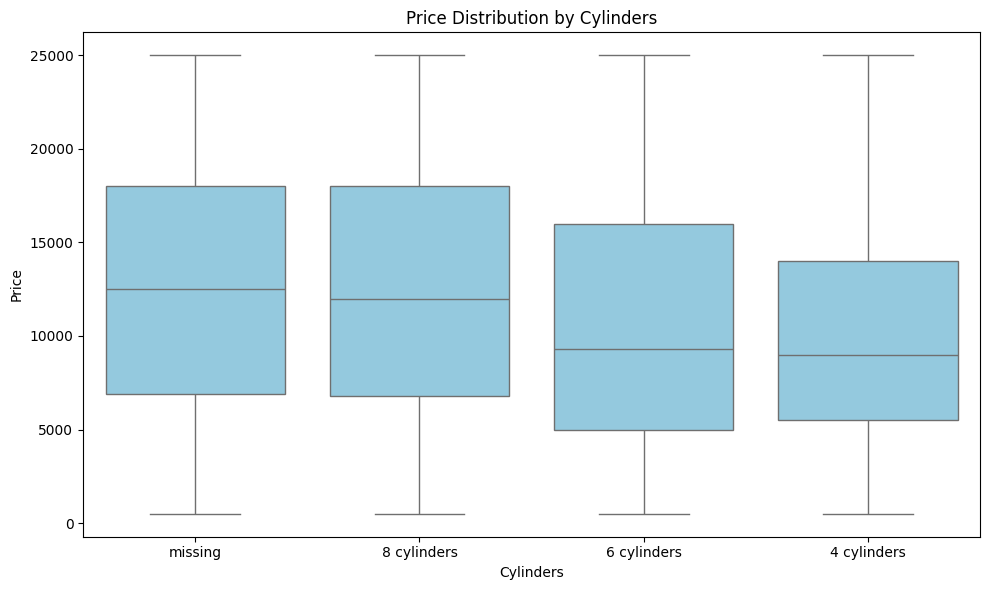

In [197]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df_clean2,
    x="cylinders",
    y="price",
    color="skyblue"
)

plt.title("Price Distribution by Cylinders")
plt.xlabel("Cylinders")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


The box plot above indicates that the missing cylinder information is not random, closely matching the 8 cylinder data.   We don't have enough information to reliably missing as 8 cylinder data, so we'll keep it, but we will re-lable the cylinders column as collapsed.

In [198]:
df_clean2["collapsed_cylinders"] = df_clean2["cylinders"]


In [199]:
df_clean3 = df_clean2.drop(columns=["cylinders"])

In [200]:
non_null_pct = df_clean3.notnull().mean().sort_values(ascending=False) * 100
non_null_pct


id                     100.000000
region                 100.000000
price                  100.000000
state                  100.000000
collapsed_cylinders    100.000000
year                    99.869191
transmission            99.510775
odometer                99.419956
fuel                    99.311198
model                   98.728164
title_status            97.968352
manufacturer            96.131422
type                    75.674413
drive                   69.958814
paint_color             69.620580
condition               62.433942
dtype: float64

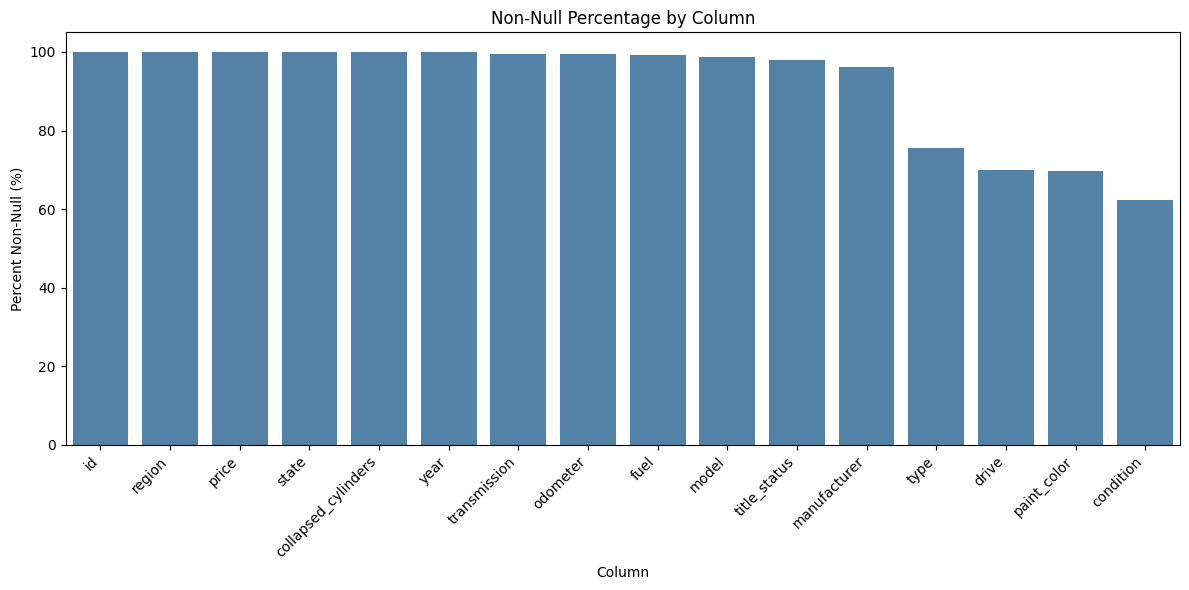

In [201]:
#here's a replot of the data above that helps visualize the number of columns with missing data, and the magnitude.
plt.figure(figsize=(12, 6))

sns.barplot(
    x=non_null_pct.index,
    y=non_null_pct.values,
    color="steelblue"
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Percent Non‑Null (%)")
plt.xlabel("Column")
plt.title("Non‑Null Percentage by Column")
plt.tight_layout()
plt.show()


Now let's explore **condition**.

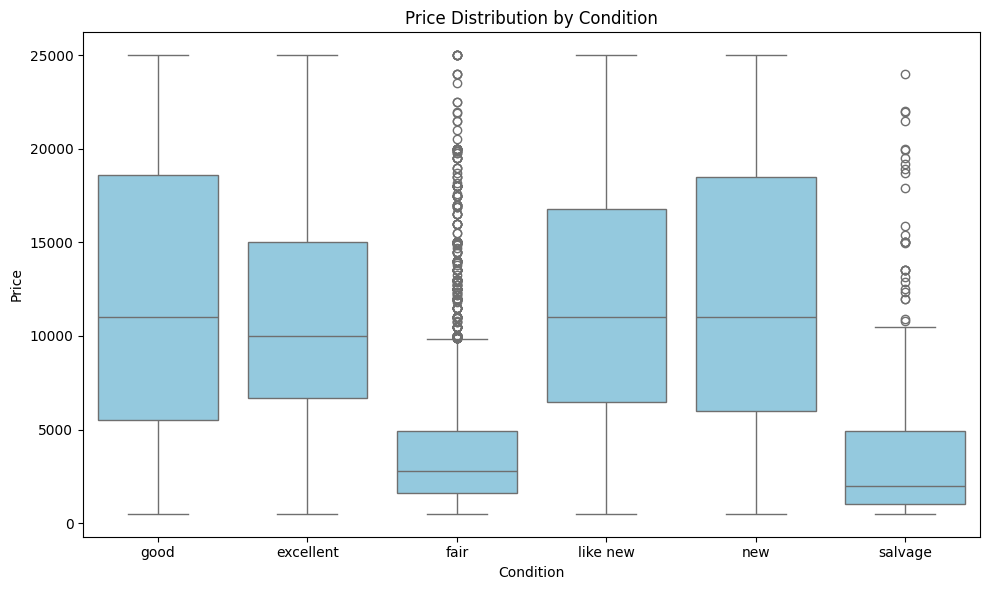

In [202]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df_clean3,
    x="condition",
    y="price",
    color="skyblue"
)

plt.title("Price Distribution by Condition")
plt.xlabel("Condition")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


From the box plot above, vehicles that are good, excellent, like new, and new command very similar prices in mean and variation around the mean.   We can collapse these four conditions into one, we'll call it
**good**.   The fair and salvage condition also share similar means and variation, we'll refer to this condition as **poor**.

In [203]:
df_clean3["condition_collapsed"] = df_clean3["condition"].replace({
    "salvage": "poor",
    "fair": "poor",
    "good": "good",
    "excellent": "good",
    "like new": "good",
    "new": "good"
})


In [204]:
df_clean4 = df_clean3.drop(columns=["condition"])

Now we need to decide how to treat missing condition data.

In [205]:
df_clean4["condition_collapsed"] = df_clean4["condition_collapsed"].fillna("missing")


In [206]:
df_clean4["condition_collapsed"].value_counts(dropna=False)


condition_collapsed
good       160157
missing    100514
poor         6895
Name: count, dtype: int64

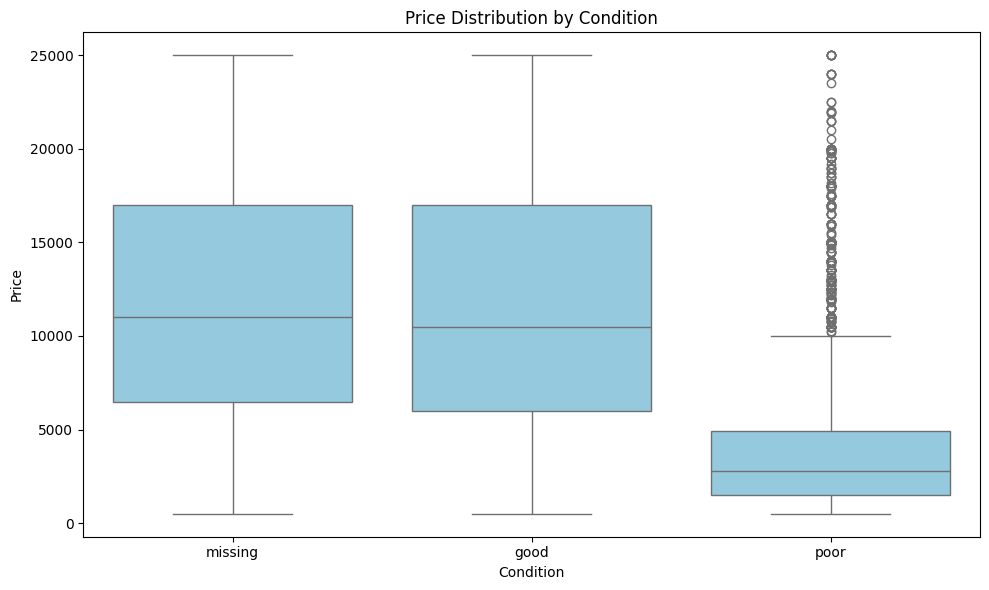

In [207]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df_clean4,
    x="condition_collapsed",
    y="price",
    color="skyblue"
)

plt.title("Price Distribution by Condition")
plt.xlabel("Condition")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


From the box plot above, the null or missing data behaves or presents similar to the good condition rating, which may mean on average missing means average or good condition.  However, poor presents much differently, in mean and in distribution, so we will keep this column, with the nulls indicated as **missing**.

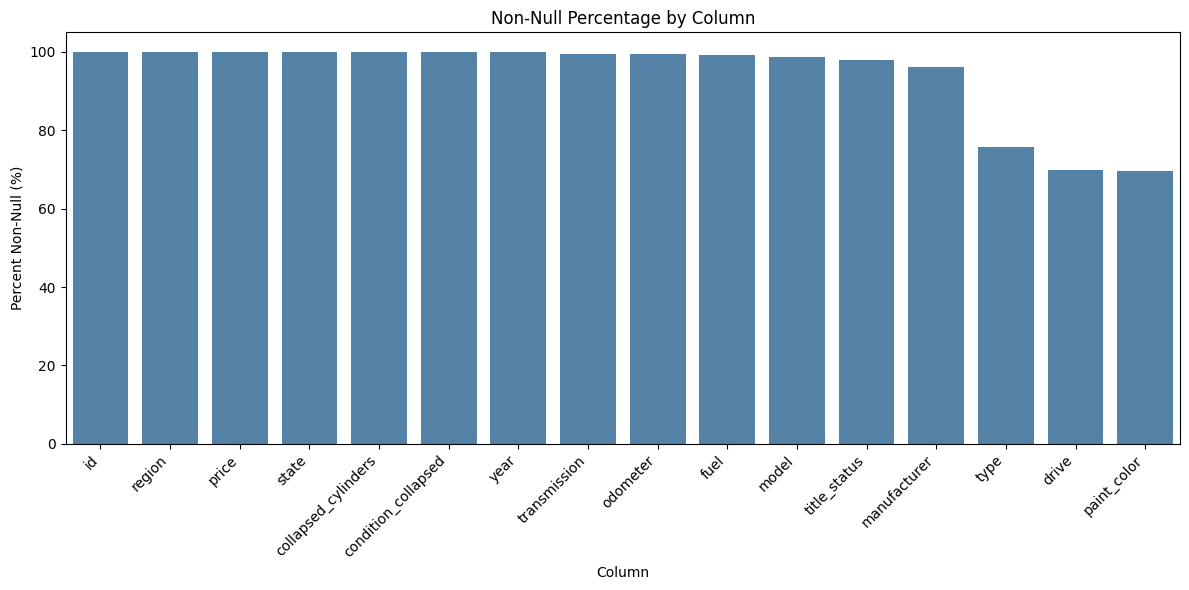

In [208]:

non_null_pct = df_clean4.notnull().mean().sort_values(ascending=False) * 100


plt.figure(figsize=(12, 6))

sns.barplot(
    x=non_null_pct.index,
    y=non_null_pct.values,
    color="steelblue"
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Percent Non‑Null (%)")
plt.xlabel("Column")
plt.title("Non‑Null Percentage by Column")
plt.tight_layout()
plt.show()


From the plot above, we need to investigate **type**, **drive**, and **paint color**, starting with **paint color**.

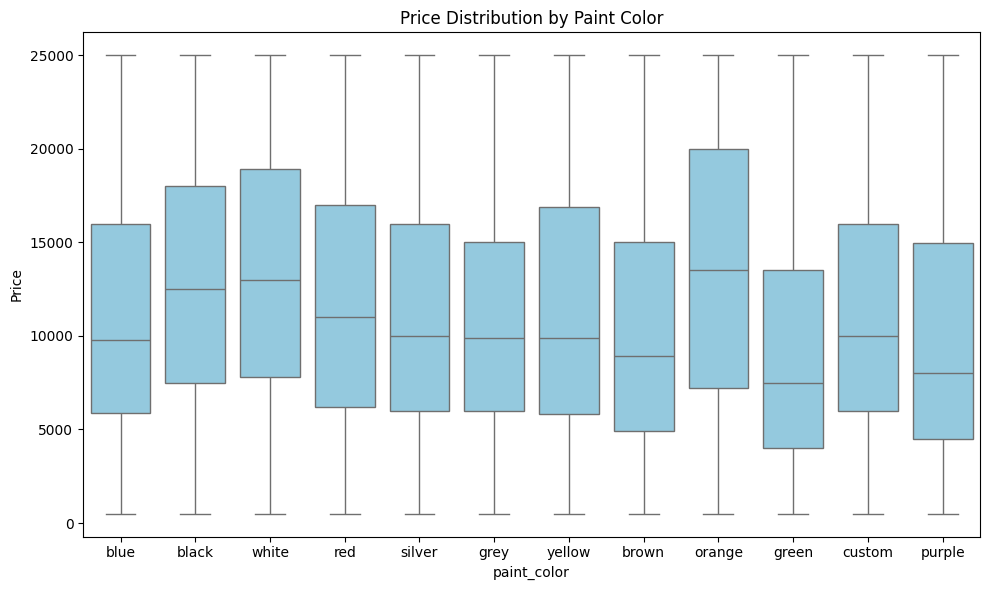

In [209]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df_clean4,
    x="paint_color",
    y="price",
    color="skyblue"
)

plt.title("Price Distribution by Paint Color")
plt.xlabel("paint_color")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


In [210]:
df_clean4.groupby("paint_color")["price"].mean().sort_values(ascending=False)



paint_color
orange    13314.332061
white     13283.223755
black     12883.006602
red       11799.701057
yellow    11333.360854
custom    11305.861372
silver    11257.555436
blue      11122.790103
grey      10934.909843
brown     10331.770682
purple    10000.119926
green      9172.993100
Name: price, dtype: float64

For paint_color, approximately 30% of the entries are null, or missing.  There are 10 paint colors, with means varying between $13,200 to $10,311.  There are three groupings, orange, black, white followed by red, custom, yellow, silver, blue, lastly grey and brown.  Before proceeding to keep or drop, let's replace the null values with **"missing"**, and replot the box plot.

In [211]:
df_clean4["paint_color"] = df_clean4["paint_color"].fillna("missing")


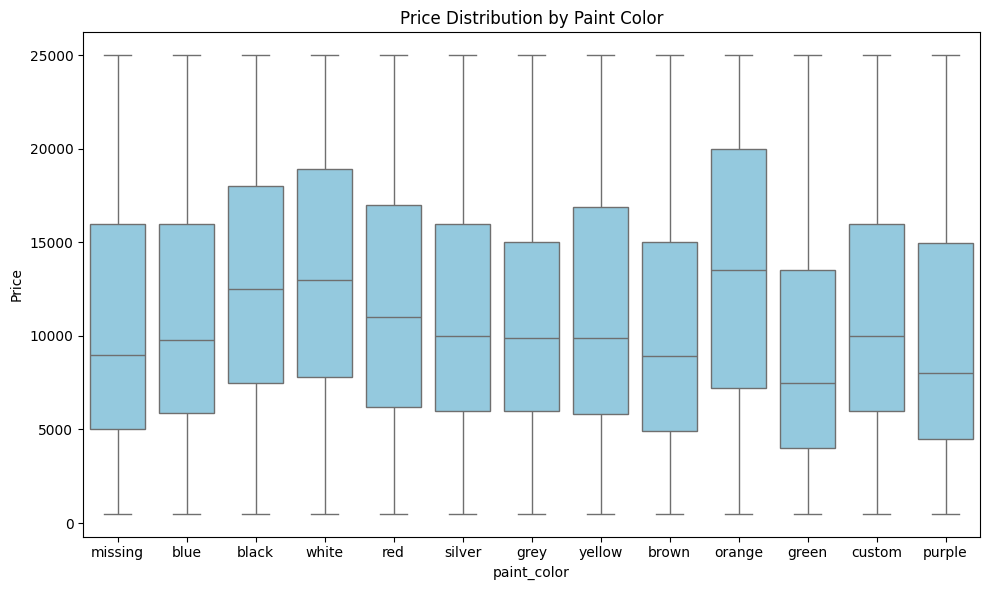

In [212]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df_clean4,
    x="paint_color",
    y="price",
    color="skyblue"
)

plt.title("Price Distribution by Paint Color")
plt.xlabel("paint_color")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


From above, the color, **missing** has a lower mean price, but has 25%-75% boxes with a similar spread indicating that the **missing** is not totally random, but may simply be a color that was mislabeled with null. For now, we will keep it, but designate another df_clean version since we replaced nulls with **missing**.

In [213]:
df_clean5 = df_clean4.copy() #df_clean5 indicates another operation to clean, replace paint_color nulls with "missing"

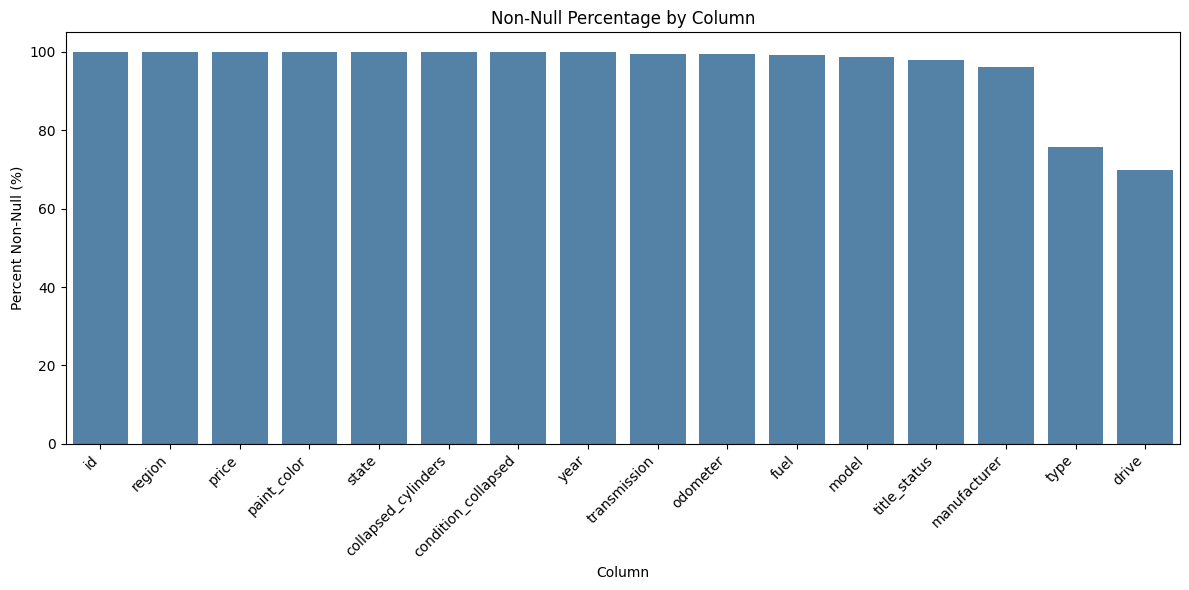

In [214]:

non_null_pct = df_clean5.notnull().mean().sort_values(ascending=False) * 100

plt.figure(figsize=(12, 6))

sns.barplot(
    x=non_null_pct.index,
    y=non_null_pct.values,
    color="steelblue"
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Percent Non‑Null (%)")
plt.xlabel("Column")
plt.title("Non‑Null Percentage by Column")
plt.tight_layout()
plt.show()


Now we examine the **drive** column.

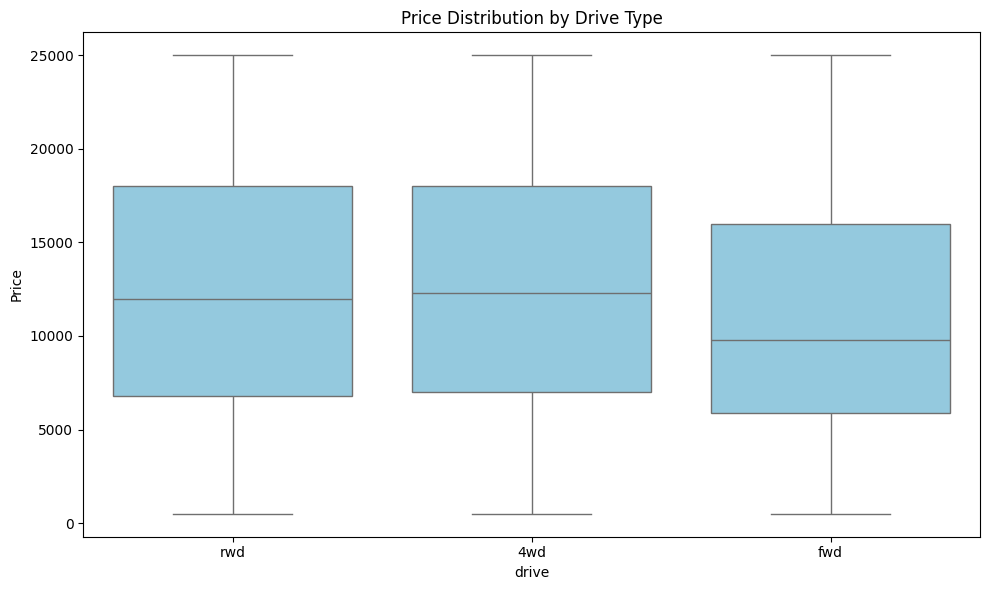

In [215]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df_clean5,
    x="drive",
    y="price",
    color="skyblue"
)

plt.title("Price Distribution by Drive Type")
plt.xlabel("drive")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


As before, let's label the drive null values, with **missing** and see how it plots relative to the other group types.

In [216]:
df_clean5["drive"] = df_clean5["drive"].fillna("missing")


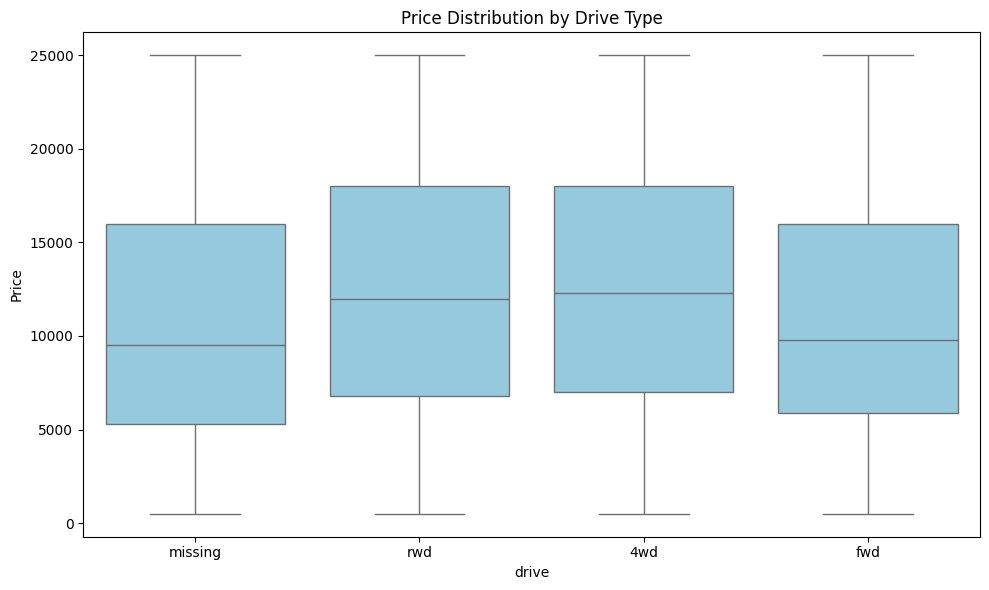

In [217]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df_clean5,
    x="drive",
    y="price",
    color="skyblue"
)

plt.title("Price Distribution by Drive Type")
plt.xlabel("drive")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


From the above plot, the missing entries, like the paint color analysis before, do not seem to be random, but present similar to a separate type of drive, so we will keep the **drive** column with null values replaced with the missing text.

In [218]:
df_clean6 = df_clean5.copy() #df_clean6 indicates another operation to clean, replace drive nulls with "missing"

Now we are ready to explore the **type** column.

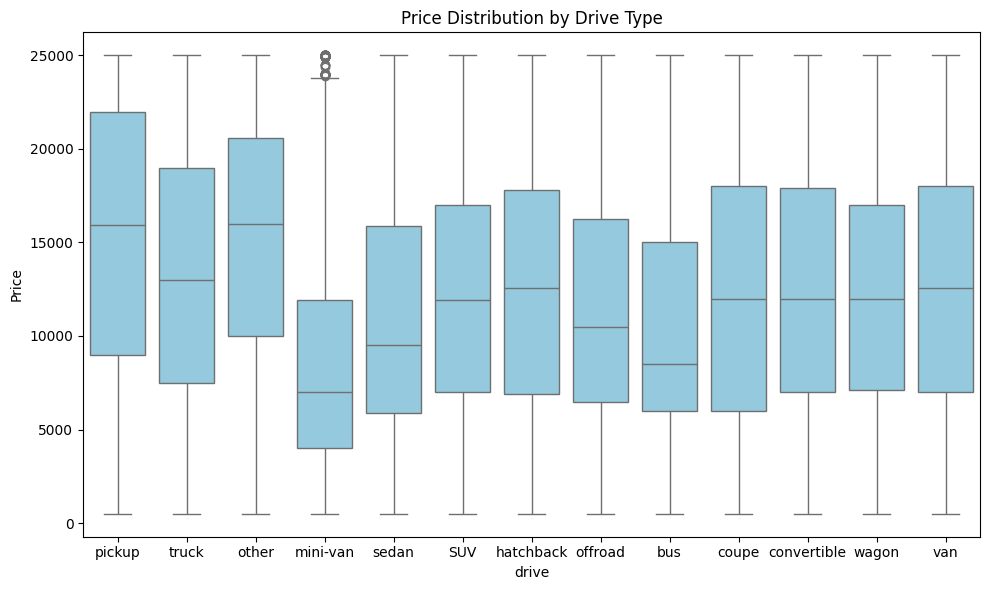

In [219]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df_clean6,
    x="type",
    y="price",
    color="skyblue"
)

plt.title("Price Distribution by Drive Type")
plt.xlabel("drive")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


The variation in mean price between a pickup and a mini-van is significant enough to keep this column.   Now let's explore the nature of the null values by replacing those intries with the **missing* text.

In [220]:
df_clean6["type"] = df_clean6["type"].fillna("missing")


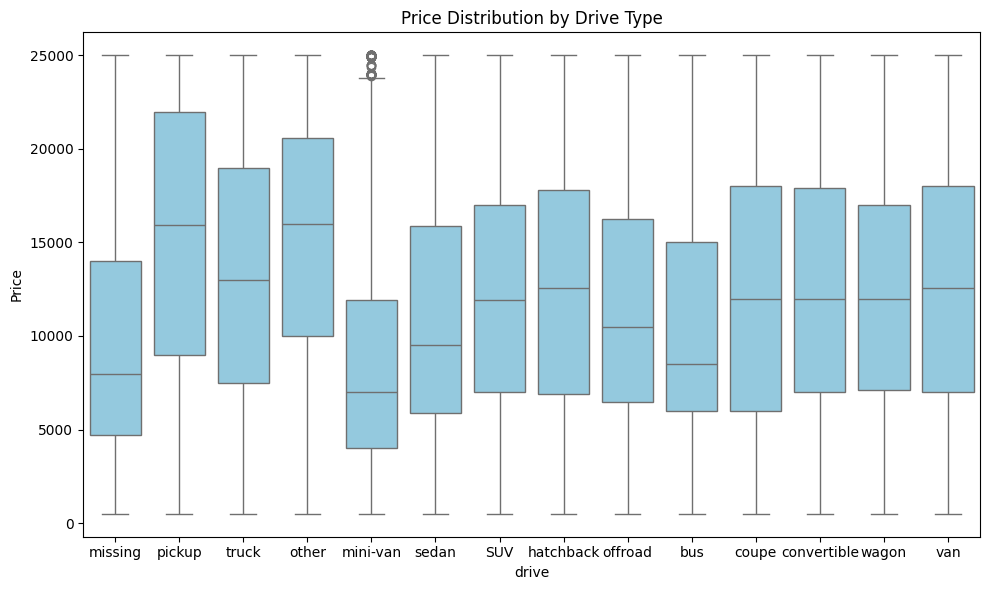

In [221]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df_clean6,
    x="type",
    y="price",
    color="skyblue"
)

plt.title("Price Distribution by Drive Type")
plt.xlabel("drive")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


As the two prior categories, **missing** doesn't seem to be random, so we will also keep these values.

In [222]:
df_clean7 = df_clean6.copy()  #df_clean7 indicates another operation to clean, replace type nulls with "missing"

Let's have one final look at the data.

In [223]:
non_null_pct = df_clean7.notnull().mean().sort_values(ascending=False) * 100
non_null_pct


id                     100.000000
region                 100.000000
price                  100.000000
drive                  100.000000
type                   100.000000
paint_color            100.000000
state                  100.000000
collapsed_cylinders    100.000000
condition_collapsed    100.000000
year                    99.869191
transmission            99.510775
odometer                99.419956
fuel                    99.311198
model                   98.728164
title_status            97.968352
manufacturer            96.131422
dtype: float64

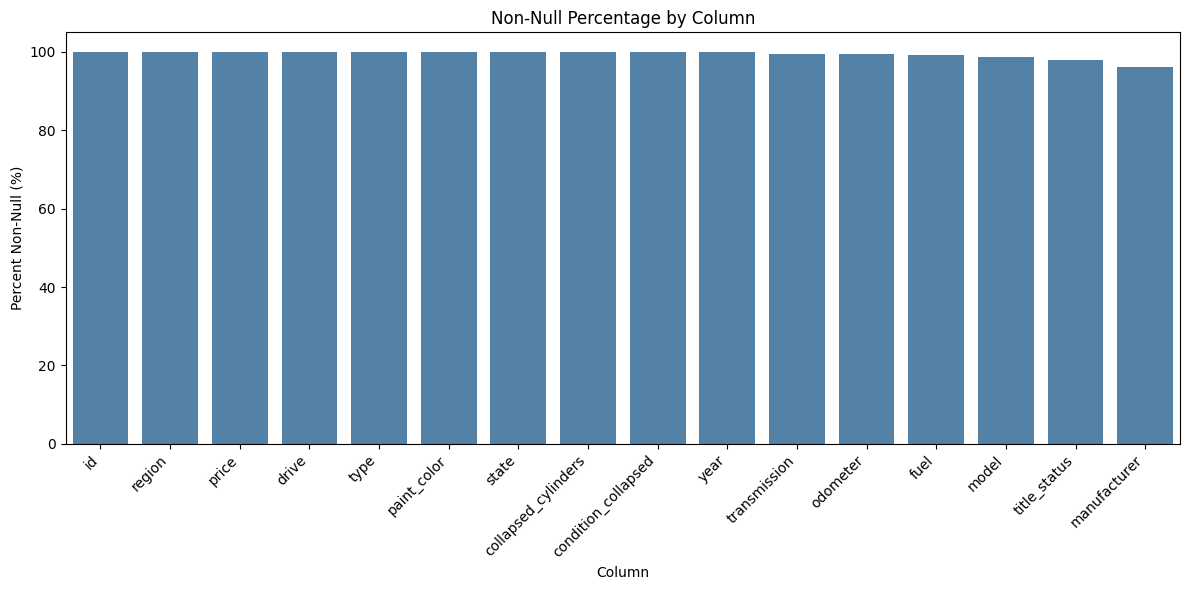

In [224]:
#here's a simple plot of the data above
plt.figure(figsize=(12, 6))

sns.barplot(
    x=non_null_pct.index,
    y=non_null_pct.values,
    color="steelblue"
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Percent Non‑Null (%)")
plt.xlabel("Column")
plt.title("Non‑Null Percentage by Column")
plt.tight_layout()
plt.show()


From above, our dataset is robust, with only 4% of the values missing from manufacturer, accordingly, we will remove all null values from the rest of the columns, and indicate the df as df_cleaned, **yay**.

In [225]:
#now let's have quick look at id
df_clean7["id"].head()

0    7222695916
1    7218891961
2    7221797935
3    7222270760
4    7210384030
Name: id, dtype: int64

This is simply a database id, so we can drop it from consideration as a price predictor.

In [226]:
df_clean8 = df_clean7.drop(columns=["id"])

Now we can drop all null data to finalize our data frame

In [227]:
df_cleaned = df_clean8.dropna()


### 4.0 Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [229]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# -----------------------------
# 1. Split features and target
# -----------------------------
X = df_cleaned.drop(columns=["price"])
y = df_cleaned["price"]

# ---------------------------------------------------------
# 2. Identify categorical and numeric columns (no warnings)
# ---------------------------------------------------------
categorical_cols = X.select_dtypes(include=["object", "string"]).columns
numeric_cols = X.select_dtypes(exclude=["object", "string"]).columns

# ---------------------------------------------------------
# 3. Preprocessing: scale numeric + one-hot encode categorical
# ---------------------------------------------------------
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

# -----------------------------
# 4. Full Ridge Regression pipeline
# -----------------------------
model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("ridge", Ridge(alpha=1.0))
])

# -----------------------------
# 5. Train/test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 6. Fit the model
# -----------------------------
model.fit(X_train, y_train)

# -----------------------------
# 7. Evaluate
# -----------------------------
preds = model.predict(X_test)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print("MAE:", mae)
print("R²:", r2)


MAE: 3043.677125956469
R²: 0.5912432142470415


In [230]:
import pandas as pd
import numpy as np

# 1. Get the fitted OneHotEncoder and scaler from the pipeline
ohe = model.named_steps["preprocess"].named_transformers_["cat"]
scaler = model.named_steps["preprocess"].named_transformers_["num"]

# 2. Get feature names for categorical columns (after one-hot encoding)
cat_feature_names = ohe.get_feature_names_out(categorical_cols)

# 3. Numeric feature names (same as original)
num_feature_names = numeric_cols

# 4. Combine all feature names in the correct order
all_feature_names = np.concatenate([num_feature_names, cat_feature_names])

# 5. Extract coefficients from the Ridge model
coeffs = model.named_steps["ridge"].coef_

# 6. Build a DataFrame for easy viewing
coef_df = pd.DataFrame({
    "feature": all_feature_names,
    "coefficient": coeffs
}).sort_values(by="coefficient", ascending=False)

coef_df


,feature,coefficient
12783,model_t bucket,33839.954324
9794,model_nomad,33691.794268
730,model_2 door sedan,33424.560872
12792,model_t-bucket,32260.729248
9494,model_model a,31929.855610
...,...,...
11798,model_sierra 1500 at4,-13008.119993
13481,model_traverse lt cloth,-13317.028779
11811,model_sierra 1500 elevation,-14034.537653
604,model_1500 maxed out big horn,-15264.154780


In [231]:
import pandas as pd
import numpy as np

# Extract transformers
ohe = model.named_steps["preprocess"].named_transformers_["cat"]
scaler = model.named_steps["preprocess"].named_transformers_["num"]

# Feature names
cat_feature_names = ohe.get_feature_names_out(categorical_cols)
num_feature_names = numeric_cols

all_feature_names = np.concatenate([num_feature_names, cat_feature_names])

# Coefficients
coeffs = model.named_steps["ridge"].coef_

coef_df = pd.DataFrame({
    "feature": all_feature_names,
    "coefficient": coeffs
}).sort_values(by="coefficient", ascending=False)

# Show top and bottom 20
coef_df.head(20), coef_df.tail(20)


(                       feature   coefficient
 12783           model_t bucket  33839.954324
 9794               model_nomad  33691.794268
 730         model_2 door sedan  33424.560872
 12792           model_t-bucket  32260.729248
 9494             model_model a  31929.855610
 9509             model_model t  28284.871956
 4415               model_coupe  27166.679725
 9502       model_model a tudor  26622.954614
 11111    model_roadster pickup  26057.210826
 9500    model_model a roadster  25762.210761
 4079                 model_coe  24623.448874
 12615           model_standard  24253.151147
 9063            model_mainline  24091.532931
 13906           model_victoria  23966.387821
 12793  model_t-bucket roadster  22653.719708
 9513       model_model-t c-cab  22557.059583
 3777            model_chieften  22472.813727
 9495        model_model a 1930  22467.531513
 4957              model_deluxe  22296.282034
 3065      model_business coupe  22265.571629,
                                 

### 5.0 Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.